In [1]:
import matplotlib.pyplot as plt
import mglearn
# from scikit-learn import make_blobs
X, y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape:", X.shape)

/home/xanrick/dev/env/mlenv/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/home/xanrick/dev/env/mlenv/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
/home/xanrick/dev/env/mlenv/lib/python3.6/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs di

X.shape: (26, 2)


In [2]:
print(y)

[1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0]


Text(0, 0.5, 'Target')

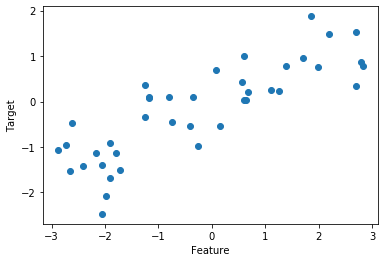

In [3]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.xlabel("Feature")
plt.ylabel("Target")

In [4]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys():\n", cancer.keys())

cancer.keys():
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [5]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape:", X.shape)

X.shape: (506, 104)


/home/xanrick/dev/env/mlenv/lib/python3.6/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


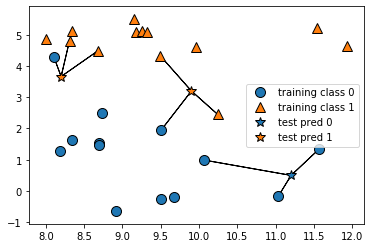

In [6]:
from sklearn.datasets import make_blobs

mglearn.plots.plot_knn_classification(n_neighbors=3)


In [7]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

/home/xanrick/dev/env/mlenv/lib/python3.6/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


In [8]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [9]:
clf.fit(X_train, y_train)
f"Test prdiction : {clf.predict(X_test)}"

'Test prdiction : [1 0 1 0 1 0 0]'

In [10]:
f"accuracy : {clf.score(X_test, y_test):.2f}"

'accuracy : 0.86'

Figure(720x216) [<matplotlib.axes._subplots.AxesSubplot object at 0x7fd9288c5978>


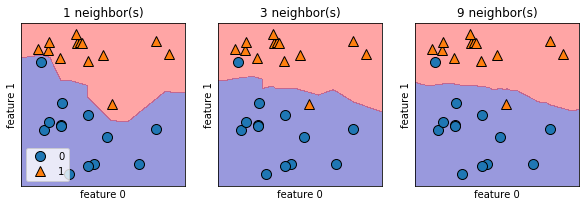

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
print(fig, axes)

for n_neighbors, ax in zip([1, 3, 9], axes):
    # the fit method returns the object self, so we can instantiate
    # and fit in one line
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

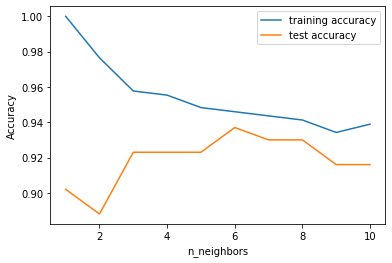

In [12]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [13]:
X_train.shape

(426, 30)

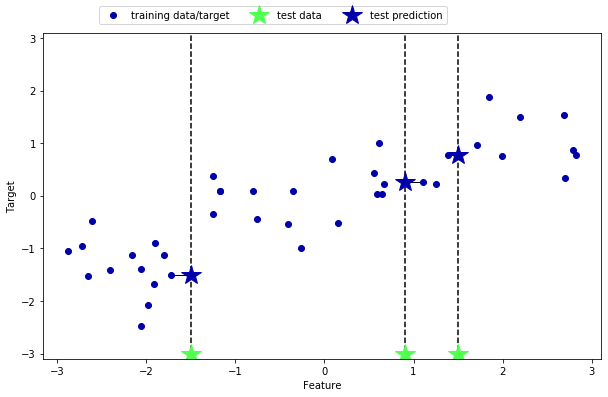

In [14]:
mglearn.plots.plot_knn_regression(n_neighbors=1)


In [15]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=3)
# fit the model using the training data and training targets
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [16]:
print("Test set predictions:\n", reg.predict(X_test))


Test set predictions:
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [17]:
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))


Test set R^2: 0.83


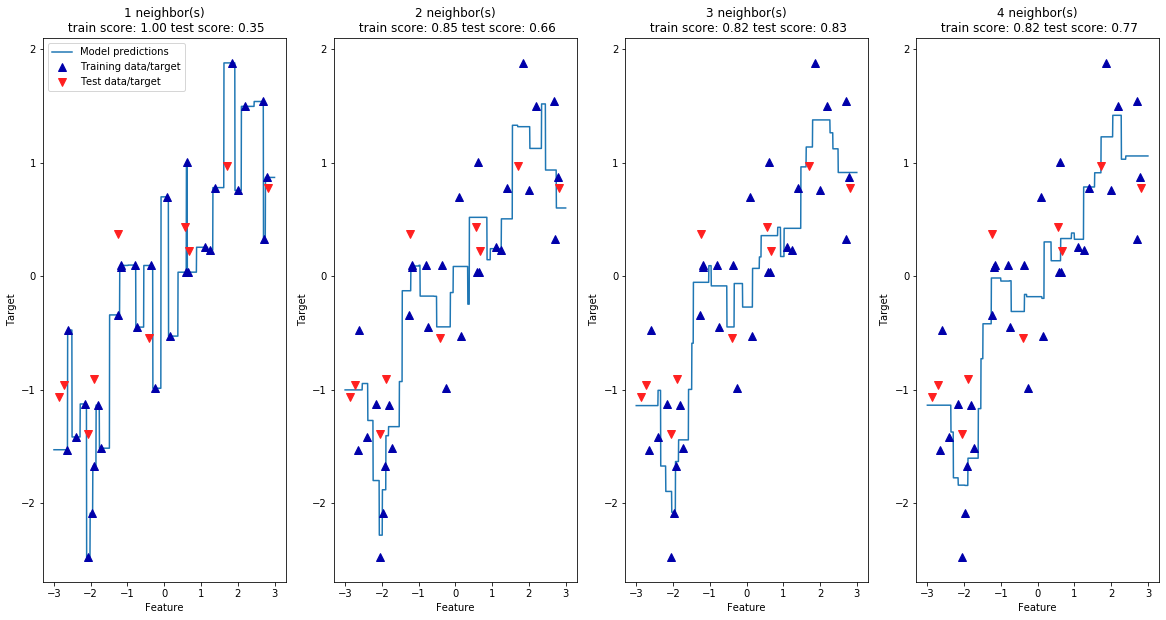

In [18]:
import numpy as np
fig, axes = plt.subplots(1, 4, figsize=(20, 10))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 2, 3, 4], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target",
                "Test data/target"], loc="best")

Figure(1440x720)


'[[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd928e93d68>\n  <matplotlib.axes._subplots.AxesSubplot object at 0x7fd92862d470>\n  <matplotlib.axes._subplots.AxesSubplot object at 0x7fd9285dba20>]\n [<matplotlib.axes._subplots.AxesSubplot object at 0x7fd92860dfd0>\n  <matplotlib.axes._subplots.AxesSubplot object at 0x7fd9285cb5c0>\n  <matplotlib.axes._subplots.AxesSubplot object at 0x7fd928578b70>]]'

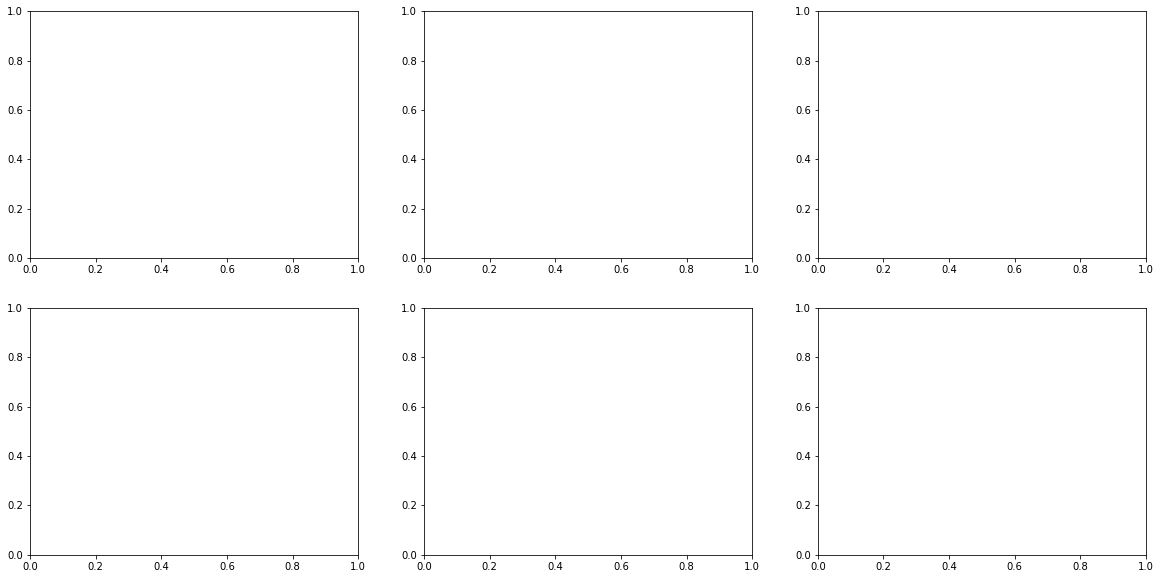

In [19]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
print(fig)
f"{axes}"

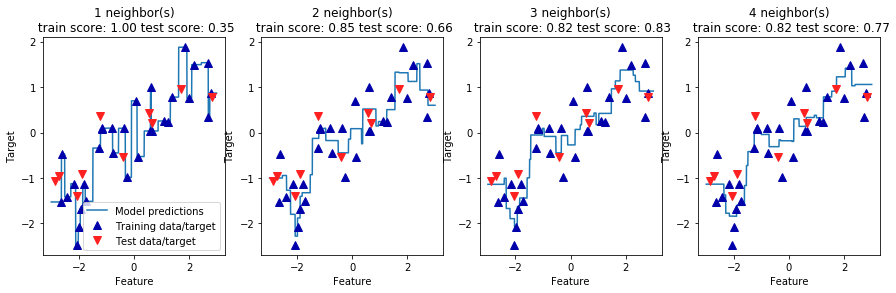

In [20]:
fig, axes = plt.subplots(1, 4, figsize=(15, 4))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 2, 3, 4], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target",
                "Test data/target"], loc="best")

w[0]: 0.393906  b: -0.031804


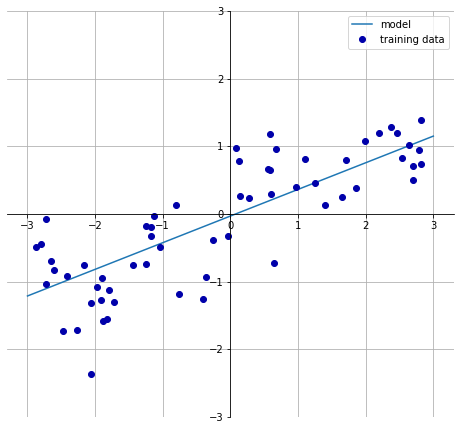

In [21]:
mglearn.plots.plot_linear_regression_wave()


In [22]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)


In [23]:
f"{lr.coef_}"

'[0.39390555]'

In [24]:
f"{lr.intercept_}"

'-0.031804343026759746'

In [25]:
lr = LinearRegression().fit(X_train, y_train)


In [26]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


In [27]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [28]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))


Training set score: 0.95
Test set score: 0.61


In [29]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


In [30]:
X_train.shape

(379, 104)

In [31]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


In [32]:
ridge01 = Ridge(alpha=.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


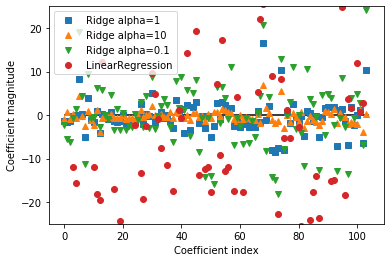

In [33]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

In [34]:
X_train[:2]

array([[2.07946779e-03, 2.20000000e-01, 1.97947214e-01, 0.00000000e+00,
        9.46502058e-02, 3.91645909e-01, 6.93099897e-01, 6.20656731e-01,
        2.60869565e-01, 2.72900763e-01, 6.91489362e-01, 9.80407484e-01,
        4.61644592e-01, 4.32418630e-06, 4.57482914e-04, 4.11624856e-04,
        0.00000000e+00, 1.96822054e-04, 8.14415054e-04, 1.44127891e-03,
        1.29063568e-03, 5.42469859e-04, 5.67488348e-04, 1.43792986e-03,
        2.03872579e-03, 9.59975060e-04, 4.84000000e-02, 4.35483871e-02,
        0.00000000e+00, 2.08230453e-02, 8.61621000e-02, 1.52481977e-01,
        1.36544481e-01, 5.73913043e-02, 6.00381679e-02, 1.52127660e-01,
        2.15689646e-01, 1.01561810e-01, 3.91830996e-02, 0.00000000e+00,
        1.87357445e-02, 7.75252166e-02, 1.37197194e-01, 1.22857271e-01,
        5.16384037e-02, 5.40199458e-02, 1.36878393e-01, 1.94068930e-01,
        9.13812608e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.000000

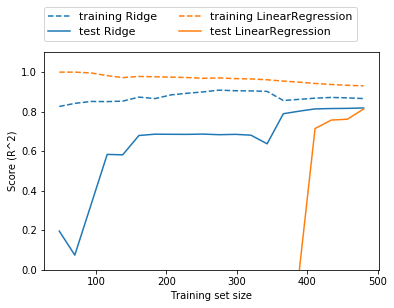

In [35]:
mglearn.plots.plot_ridge_n_samples()


In [36]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso.coef_ != 0))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


In [37]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso001.coef_ != 0))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


In [38]:
lasso001.coef_


array([ -0.        ,  -0.        ,  -0.        ,   0.        ,
        -0.        ,   0.        ,  -0.        ,  -1.43260465,
        10.94771183,   0.        ,   0.        ,   0.        ,
        -0.39260971,  -0.        ,  -0.        ,  -0.        ,
         0.        ,  -0.        ,  -0.        ,  -0.        ,
        -0.        ,  -8.75628457,  -0.        ,  -0.        ,
        -0.        ,  -0.        ,   2.10027365,  -0.        ,
         0.        ,  -0.        ,   0.        ,  -0.        ,
         0.        ,   0.        ,  -0.        ,   0.        ,
        -0.        ,  -0.        ,   0.        ,   0.        ,
         0.        ,  -0.        ,   0.        ,  -3.96958293,
         0.        ,   6.61845793,  -0.        ,  -0.        ,
        -0.        ,   0.        ,  -4.42086828,  -2.10371434,
         3.79607992,  -0.        ,   4.38591262,   0.        ,
         0.        ,   0.1795777 ,  -0.        ,  -1.1614282 ,
        -4.33485764,  -0.        ,  -0.        ,  -2.13

In [39]:
lasso001.intercept_

20.47637168564111

In [40]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso00001.coef_ != 0))

Training set score: 0.95
Test set score: 0.64
Number of features used: 96


Text(0, 0.5, 'Coefficient magnitude')

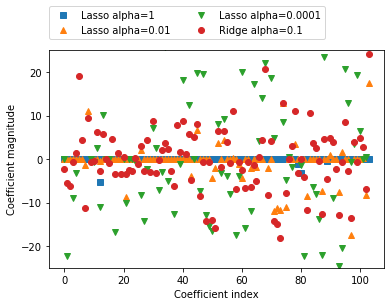

In [41]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

In [45]:
X_train[1]

array([1.08980702e-03, 2.50000000e-01, 1.71187683e-01, 0.00000000e+00,
       1.39917695e-01, 4.53343552e-01, 4.56230690e-01, 5.27639608e-01,
       3.04347826e-01, 1.85114504e-01, 7.55319149e-01, 1.00000000e+00,
       2.06677704e-01, 1.18767935e-06, 2.72451756e-04, 1.86561539e-04,
       0.00000000e+00, 1.52483287e-04, 4.94056987e-04, 4.97203410e-04,
       5.75025350e-04, 3.31680398e-04, 2.01739086e-04, 8.23152113e-04,
       1.08980702e-03, 2.25238813e-04, 6.25000000e-02, 4.27969208e-02,
       0.00000000e+00, 3.49794239e-02, 1.13335888e-01, 1.14057673e-01,
       1.31909902e-01, 7.60869565e-02, 4.62786260e-02, 1.88829787e-01,
       2.50000000e-01, 5.16694260e-02, 2.93052229e-02, 0.00000000e+00,
       2.39521861e-02, 7.76068325e-02, 7.81010749e-02, 9.03254020e-02,
       5.21005993e-02, 3.16893231e-02, 1.29301335e-01, 1.71187683e-01,
       3.53806774e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [44]:
X_train.shape

(379, 104)